# 01 Project - Exploratory Data Analysis(EDA) 
## By: Feroz Kazi ( 22-Nov-2019 )
### Description of Project: MovieLens data sets were collected by the GroupLens Research Project. 
### Scope of project are listed in the sections below. 
##### Data acquisition of the movielens dataset, users, rating.
##### Perform the Exploratory Data Analysis (EDA) for the users dataset 
##### Visualize user age distribution, 
##### Visualize overall rating by users
##### Men watch more drama than women
##### Men watch more Romance than women
##### Women watch more Sci-Fi than men


## 1. Import important libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import seaborn as sns
%matplotlib inline
import datetime

## 2.  Load required data

In [3]:
# WE have a ratings here
dfData = pd.read_csv('u.data', sep='\t', header=None)
dfData.columns=['user_id', 'movie_id', 'rating','timestamp']

# WE have a Movie's Details here
dfItem = pd.read_csv('u.item', sep='|', encoding='latin-1',header=None)
dfItem.columns = ['movie_id', 'title', 'release_date', 'video_release_date', 'imdb_url','unknown',
                   'Action','Adventure','Animation','Children','Comedy','Crime','Documentary', 'Drama', 'Fantasy',
                   'Film-Noir','Horror', 'Musical', 'Mystery', 'Romance', 'Sci_Fi', 'Thriller', 'War', 'Western']

# WE have a User Details here
dfUser = pd.read_csv('u.user', sep='|', encoding='latin-1',header=None)
dfUser.columns = ['user_id', 'age', 'gender', 'occupation', 'zip_code']

### 2.1 Preprocessing of data: Genre and Year of Release

In [4]:
dfItem['Genre'] = dfItem.eq(1).apply(lambda x: ', '.join(x[x].index), axis = 1)
dfItem['arrGenre'] = dfItem['Genre'].str.split(',')
dfItem['yearMov'] = pd.to_datetime(dfItem['release_date']).dt.year

### 2.1 We are doing to merge the data in big DF  all the data to analyze it more effiecently and also sometime we might use SubDataFrames too!!!

In [5]:
dfMovRatings = pd.merge(dfData, dfItem)
dfMovUser = pd.merge(dfMovRatings, dfUser)
dfMovUser.head()

,user_id,movie_id,rating,timestamp,title,release_date,video_release_date,imdb_url,unknown,Action,...,Thriller,War,Western,Genre,arrGenre,yearMov,age,gender,occupation,zip_code
0,196,242,3,881250949,Kolya (1996),24-Jan-1997,NaN,http://us.imdb.com/M/title-exact?Kolya%20(1996),0,0,...,0,0,0,Comedy,[Comedy],1997.0,49,M,writer,55105
1,196,257,2,881251577,Men in Black (1997),04-Jul-1997,NaN,http://us.imdb.com/M/title-exact?Men+in+Black+...,0,1,...,0,0,0,"Action, Adventure, Comedy, Sci_Fi","[Action, Adventure, Comedy, Sci_Fi]",1997.0,49,M,writer,55105
2,196,111,4,881251793,"Truth About Cats & Dogs, The (1996)",26-Apr-1996,NaN,http://us.imdb.com/M/title-exact?Truth%20About...,0,0,...,0,0,0,"Comedy, Romance","[Comedy, Romance]",1996.0,49,M,writer,55105
3,196,25,4,881251955,"Birdcage, The (1996)",08-Mar-1996,NaN,"http://us.imdb.com/M/title-exact?Birdcage,%20T...",0,0,...,0,0,0,Comedy,[Comedy],1996.0,49,M,writer,55105
4,196,382,4,881251843,"Adventures of Priscilla, Queen of the Desert, ...",01-Jan-1994,NaN,http://us.imdb.com/M/title-exact?Adventures%20...,0,0,...,0,0,0,"Comedy, Drama","[Comedy, Drama]",1994.0,49,M,writer,55105


## 3.Visualization - univariate plots of the attributes

## 3.1: 'rating', 'age', 'release date', 'gender' and 'occupation'

### 3.2 Visualize user for  distribution: Age

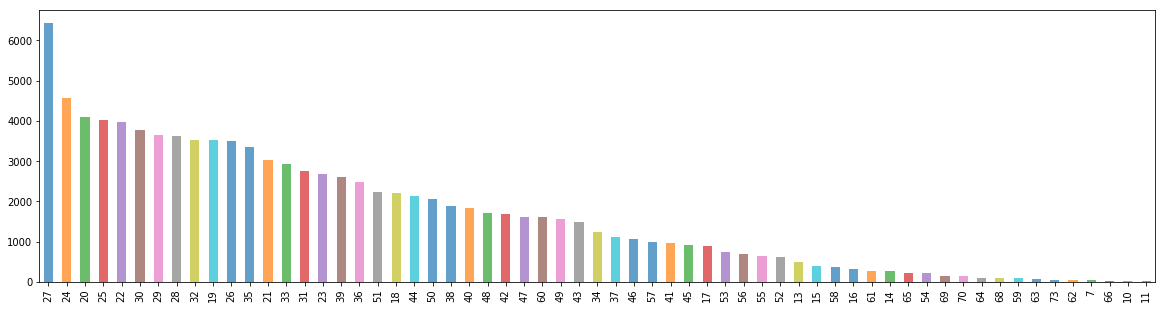

In [6]:
dfMovUser['age'].value_counts().plot(kind='bar',alpha=0.7,figsize=(20,5))
plt.show()

### 3.2.1 Visualize for: Age Histogram (Distribution)

Text(0.5, 0, 'Age')

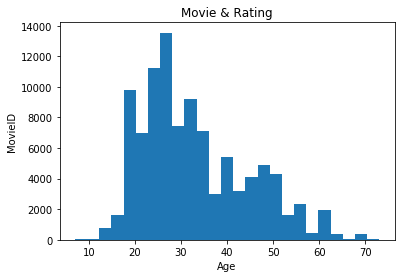

In [8]:
#Create a histogram for movie
dfMovUser.age.plot.hist(bins=25)
plt.title("Movie & Rating")
plt.ylabel('MovieID')
plt.xlabel('Age')

### 3.3 Visualize user for  distribution: Rating

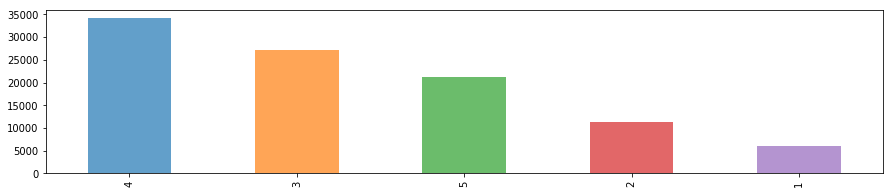

In [7]:
dfMovUser['rating'].value_counts().plot(kind='bar',alpha=0.7,figsize=(15,3))
plt.show()

### 3.3.1 Visualize for: Rating Histogram (Distribution)

Text(0.5, 0, 'Rating')

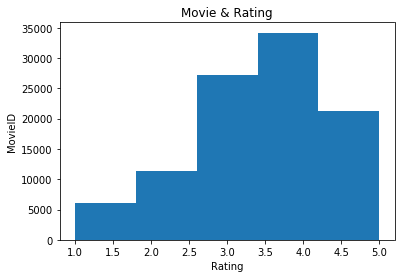

In [8]:
#Create a histogram for movie
dfMovUser.rating.plot.hist(bins=5)
plt.title("Movie & Rating")
plt.ylabel('MovieID')
plt.xlabel('Rating')

### 3.4 Visualize user for  distribution: Occupation

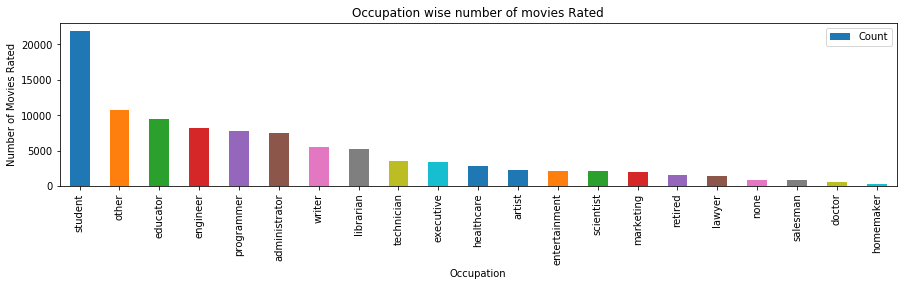

In [9]:
dfOcc=pd.DataFrame(dfMovUser.groupby(["occupation"]).size())
dfOcc["Count"]=dfOcc
dfOcc = dfOcc.sort_values('Count', ascending=False)
ax=dfOcc.plot(kind='bar',y="Count",title="Occupation wise number of movies Rated", figsize=(15,3))
ax.set_ylabel("Number of Movies Rated")
ax.set_xlabel("Occupation")
plt.show()


### 3.5 Top Rated (which received atleast a 100 ratings)

In [10]:
# now lets only consider movies which have atleast 100 ratings and see how the top 10 movies change
dfSubMovAndRatings = dfMovUser[['movie_id', 'title', 'rating']]
dfSubMov = dfSubMovAndRatings.groupby(['movie_id', 'title'], as_index=False).count()
dfSubTopRates = dfSubMov[dfSubMov['rating'] > 100].sort_values(by='rating', ascending=False)
dfSubTopRates.head(10)

,movie_id,title,rating
49,50,Star Wars (1977),583
257,258,Contact (1997),509
99,100,Fargo (1996),508
180,181,Return of the Jedi (1983),507
293,294,Liar Liar (1997),485
285,286,"English Patient, The (1996)",481
287,288,Scream (1996),478
0,1,Toy Story (1995),452
299,300,Air Force One (1997),431
120,121,Independence Day (ID4) (1996),429


### 3.5.1 Visualize for: Release Date

Text(0.5, 0, 'Ratings')

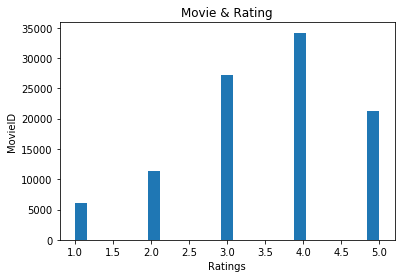

In [11]:
#Create a histogram for movie
dfMovUser.rating.plot.hist(bins=25)
plt.title("Movie & Rating")
plt.ylabel('MovieID')
plt.xlabel('Ratings')

## 4.Top 25 Movies Rating by Average

### Display the top 25 movies by average rating.

In [12]:
#Display the top 25 movies by average rating, as a list/series/dataframe.
dfTmpRated = dfMovUser.groupby('title').agg({'rating': [np.size, np.mean]})
dfRated100= dfTmpRated['rating']['size'] >= 100
dfTmpRated = dfTmpRated[dfRated100].sort_values([('rating', 'mean')], ascending=False)[:25]
dfTmpRated


rating          
                                                     size      mean
title                                                              
Close Shave, A (1995)                                 112  4.491071
Schindler's List (1993)                               298  4.466443
Wrong Trousers, The (1993)                            118  4.466102
Casablanca (1942)                                     243  4.456790
Shawshank Redemption, The (1994)                      283  4.445230
Rear Window (1954)                                    209  4.387560
Usual Suspects, The (1995)                            267  4.385768
Star Wars (1977)                                      583  4.358491
12 Angry Men (1957)                                   125  4.344000
Citizen Kane (1941)                                   198  4.292929
To Kill a Mockingbird (1962)                          219  4.292237
One Flew Over the Cuckoo's Nest (1975)                264  4.291667
Silence of the Lambs, The (1991)                      390  4.289744
North by Northwest (1959)                             179  4.284916
Godfather, The (1972)                                 413  4.283293
Secrets & Lies (1996)                                 162  4.265432
Good Will Hunting (1997)                              198  4.262626
Manchurian Candidate, The (1962)                      131  4.259542
Dr. Strangelove or: How I Learned to Stop Worry...    194  4.252577
Raiders of the Lost Ark (1981)                        420  4.252381
Vertigo (1958)                                        179  4.251397
Titanic (1997)                                        350  4.245714
Lawrence of Arabia (1962)                             173  4.231214
Maltese Falcon, The (1941)                            138  4.210145
Empire Strikes Back, The (1980)                       367  4.204360

## 5. Visualize how popularity of Genres has changed over the years.

### 5.1 We are using SubDF

<Figure size 1584x504 with 0 Axes>

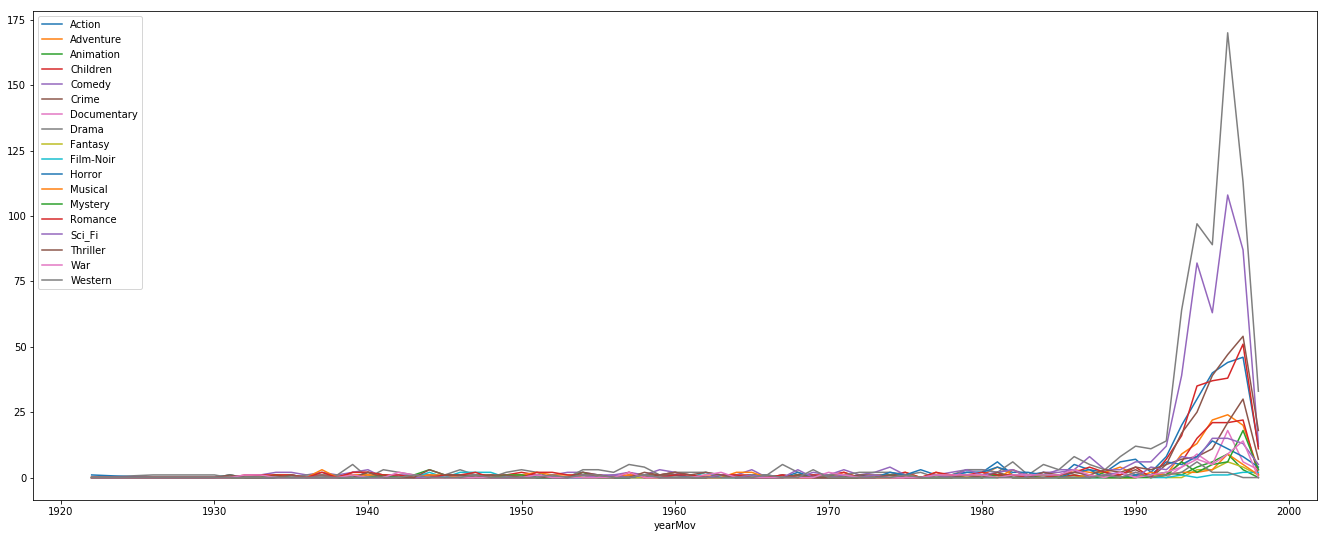

In [13]:
plt.figure(figsize=(22,7))
genrMoviesGrp = dfItem.groupby(['yearMov'])['Action','Adventure','Animation','Children','Comedy','Crime',
                               'Documentary', 'Drama', 'Fantasy', 'Film-Noir','Horror', 'Musical', 
                               'Mystery', 'Romance', 'Sci_Fi', 'Thriller', 'War', 'Western'].sum()
genrMoviesGrp.plot(figsize=(23,9))

## 6.0 Gender Distribution Analysis

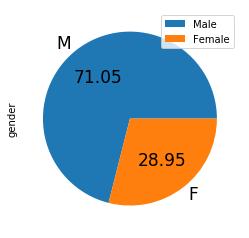

In [14]:
ctrGender = dfUser.gender.value_counts(sort=True)
labels = ctrGender.index
values = ctrGender.values
ctrGender.plot(kind='pie', fontsize=17, autopct='%.2f')
plt.legend(labels=['Male','Female'],loc="best")

Text(0.5, 0.98, 'Occupation Distribution Male/Female')

<Figure size 1440x1080 with 0 Axes>

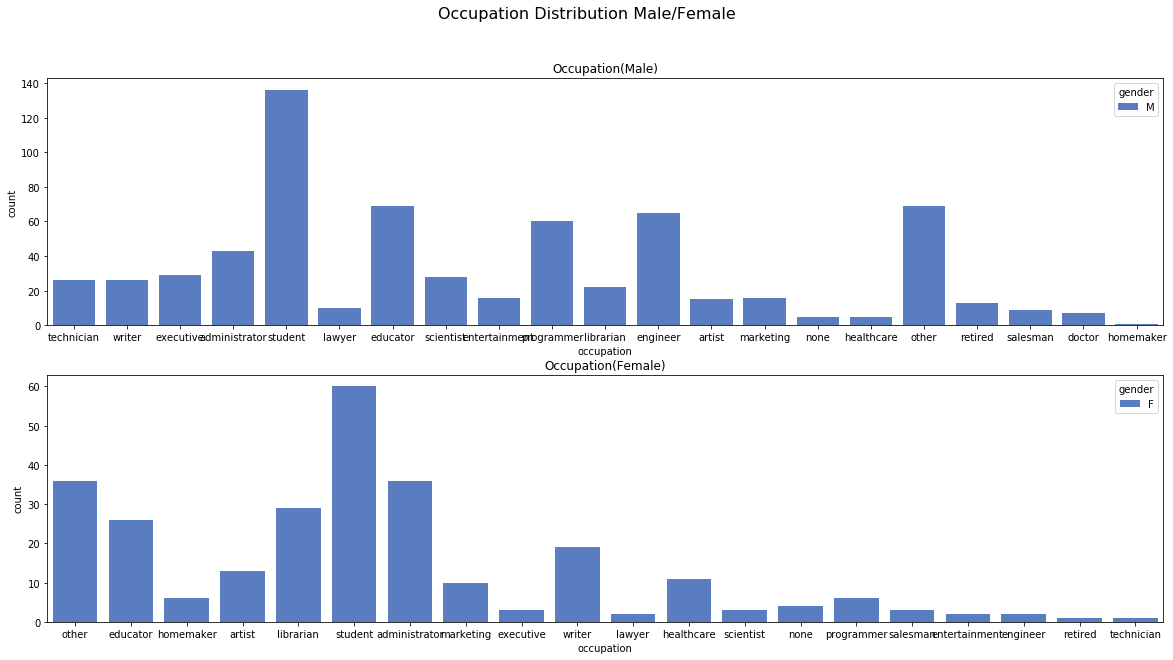

In [15]:
male = dfUser[dfUser.gender=='M']
female = dfUser[dfUser.gender=='F'] 

count_male = male.dropna().occupation.value_counts()[:10].reset_index()
count_female = female.dropna().occupation.value_counts()[:10].reset_index()

plt.figure(2, figsize=(20,15))
grdFig = GridSpec(2,1)
plt.figure(figsize=(20,10))

plt.subplot(grdFig[0, 0],  title='Occupation(Male)')
sns.countplot(hue=male.gender, x=male['occupation'], palette="muted")  

plt.subplot(grdFig[1, 0], title='Occupation(Female)')
sns.countplot(hue=female.gender, x=female['occupation'], palette="muted",)  


plt.suptitle('Occupation Distribution Male/Female', fontsize=16)


### 6.1 Gender - Age Distribution of Rating

gender
F    AxesSubplot(0.125,0.125;0.775x0.755)
M    AxesSubplot(0.125,0.125;0.775x0.755)
Name: age, dtype: object

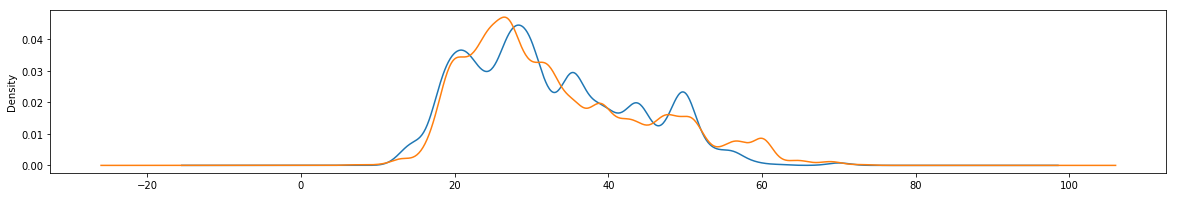

In [16]:
dfMovUser.groupby('gender').age.plot(kind='kde',  figsize=[20, 3])

In [17]:
dfMFByTitle = dfMovUser.pivot_table(index=['movie_id', 'title'],
                           columns=['gender'],
                           values='rating',
                           fill_value=0)
dfMFByTitle.head()

,gender,F,M
movie_id,title,,
1,Toy Story (1995),3.789916,3.909910
2,GoldenEye (1995),3.368421,3.178571
3,Four Rooms (1995),2.687500,3.108108
4,Get Shorty (1995),3.400000,3.591463
5,Copycat (1995),3.772727,3.140625


## 7. Visualization - Male vs Female Difference in rating by top 50 Movie

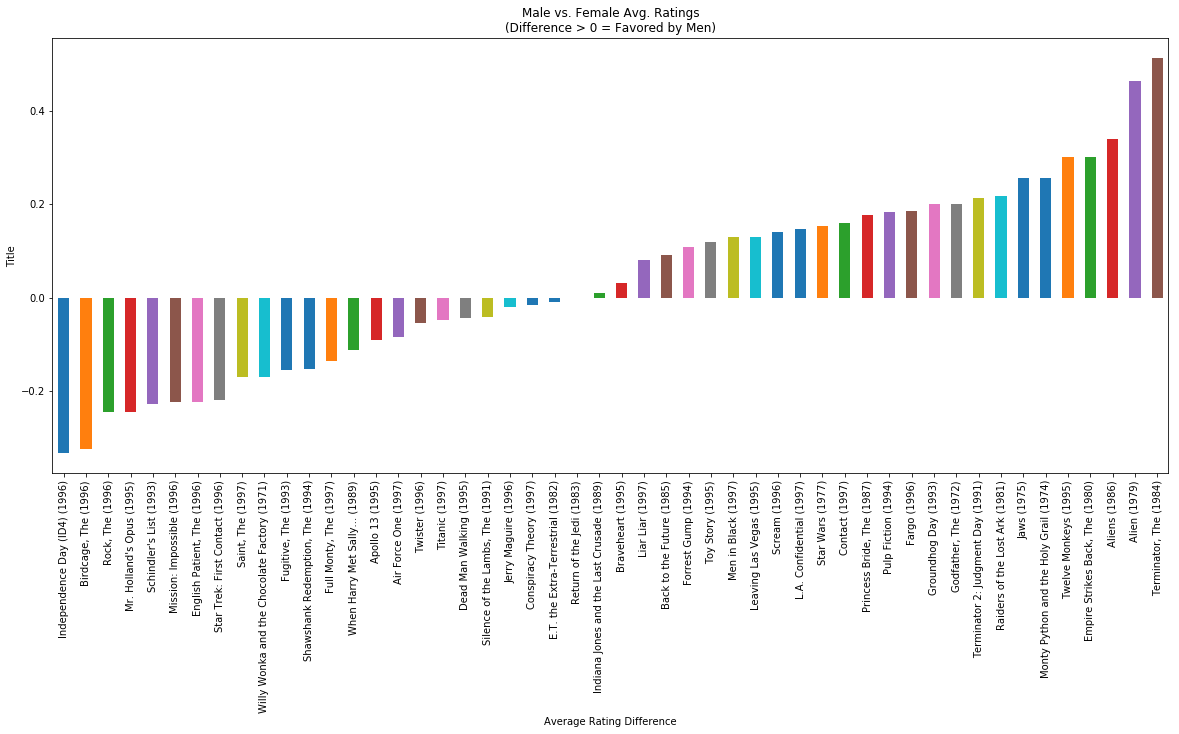

In [18]:
dfTop50 = dfMovUser.groupby('movie_id').size().sort_values(ascending=False)[:50]
dfMFByTitle['diff'] = dfMFByTitle.M - dfMFByTitle.F
dfMFByTitle.reset_index('movie_id', inplace=True)
diffMF = dfMFByTitle[dfMFByTitle.movie_id.isin(dfTop50.index)]['diff']
diffMF.sort_values().plot(kind='bar', figsize=[20, 8])
plt.title('Male vs. Female Avg. Ratings\n(Difference > 0 = Favored by Men)')
plt.ylabel('Title')
plt.xlabel('Average Rating Difference');

In [27]:
# Male DF with Genre
dfGenreGender = dfMovUser.copy()
dfGenreGender.drop(['movie_id', 'title', 'release_date', 'video_release_date', 'imdb_url', 'yearMov','zip_code'],axis=1,inplace=True)
#dfGenreGender.head()

## 7.1 Visualization - Distribution of Male vs Female by Genre

Text(0.5, 0.98, 'Genre Distribution Male/Female')

<Figure size 1440x360 with 0 Axes>

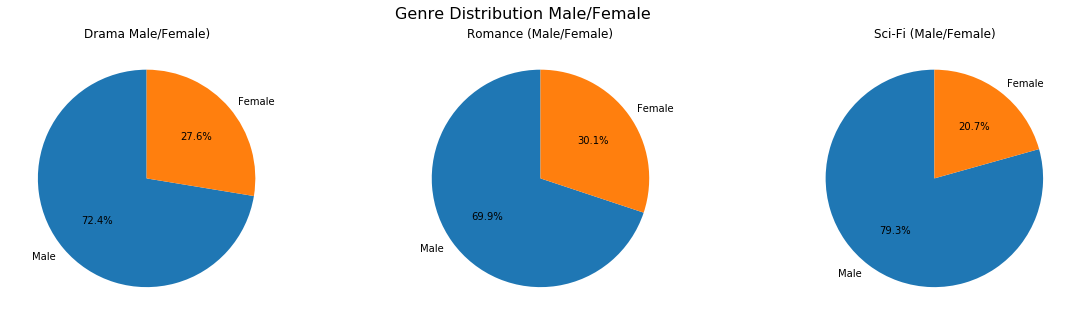

In [25]:

#Drama Male Female
dfDrama = dfGenreGender[dfGenreGender['Drama'] == 1]
totRecDrama=dfDrama.size
totRecMale = dfDrama[dfDrama['gender'] == 'M'].size
totRecFemale = dfDrama[dfDrama['gender'] == 'F'].size

sliceDrama = [totRecMale, totRecFemale]
genderDrama = ['Male', 'Female']
colors = ['r', 'g']

plt.figure(2, figsize=(20,5))
grdFig = GridSpec(1,3)
plt.figure(figsize=(20,5))
plt.subplot(grdFig[0, 0],  title='Drama Male/Female)')
plt.pie(sliceDrama, labels=genderDrama,  startangle=90, autopct='%.1f%%')



#Romance Male vs Female
dfRomance = dfGenreGender[dfGenreGender['Romance'] == 1]
totRecRomance=dfRomance.size
totRecMale = dfRomance[dfRomance['gender'] == 'M'].size
totRecFemale = dfRomance[dfRomance['gender'] == 'F'].size

sliceRomance = [totRecMale, totRecFemale]
genderRomance = ['Male', 'Female']


plt.subplot(grdFig[0, 1], title='Romance (Male/Female)')
plt.pie(sliceRomance, labels=genderRomance,  startangle=90, autopct='%.1f%%')


# Science Fictions Male vs Female
dfSciFi = dfGenreGender[dfGenreGender['Sci_Fi'] == 1]
totRecSciFi=dfSciFi.size
totRecMale = dfSciFi[dfSciFi['gender'] == 'M'].size
totRecFemale = dfSciFi[dfSciFi['gender'] == 'F'].size

sliceSciFi = [totRecMale, totRecFemale]
genderSciFi = ['Male', 'Female']
colors = ['r', 'g']
plt.subplot(grdFig[0, 2], title='Sci-Fi (Male/Female)')
plt.pie(sliceSciFi, labels=genderSciFi,  startangle=90, autopct='%.1f%%')

plt.suptitle('Genre Distribution Male/Female', fontsize=16)

## 7.2 Visualization - Distribution of Male vs Female RATINGs (Average) by Genre

Text(0.5, 0.98, 'Genre Rating Distribution Male/Female')

<Figure size 1440x360 with 0 Axes>

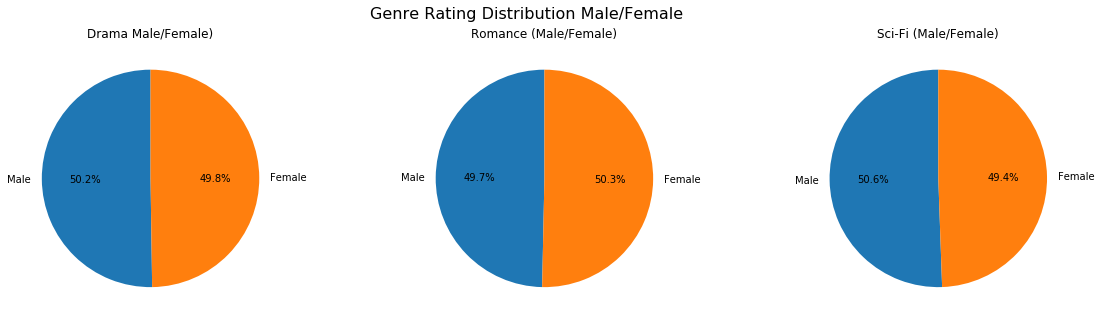

In [26]:

#Drama Male Female
dfDrama = dfGenreGender[dfGenreGender['Drama'] == 1]
totRecDrama=dfDrama.size
totRecMaleRateAvg = dfDrama[dfDrama['gender'] == 'M'].rating.mean()
totRecFemaleRateAvg = dfDrama[dfDrama['gender'] == 'F'].rating.mean()

sliceDrama = [totRecMaleRateAvg, totRecFemaleRateAvg]
genderDrama = ['Male', 'Female']
colors = ['r', 'g']

plt.figure(2, figsize=(20,5))
grdFig = GridSpec(1,3)
plt.figure(figsize=(20,5))
plt.subplot(grdFig[0, 0],  title='Drama Male/Female)')
plt.pie(sliceDrama, labels=genderDrama,  startangle=90, autopct='%.1f%%')



#Romance Male vs Female
dfRomance = dfGenreGender[dfGenreGender['Romance'] == 1]
totRecRomance=dfRomance.size
totRecMaleRateAvg = dfRomance[dfRomance['gender'] == 'M'].rating.mean()
totRecFemaleRateAvg = dfRomance[dfRomance['gender'] == 'F'].rating.mean()

sliceRomance = [totRecMaleRateAvg, totRecFemaleRateAvg]
genderRomance = ['Male', 'Female']


plt.subplot(grdFig[0, 1], title='Romance (Male/Female)')
plt.pie(sliceRomance, labels=genderRomance,  startangle=90, autopct='%.1f%%')


# Science Fictions Male vs Female
dfSciFi = dfGenreGender[dfGenreGender['Sci_Fi'] == 1]
totRecSciFi=dfSciFi.size
totRecMaleRateAvg = dfSciFi[dfSciFi['gender'] == 'M'].rating.mean()
totRecFemaleRateAvg = dfSciFi[dfSciFi['gender'] == 'F'].rating.mean()

sliceSciFi = [totRecMaleRateAvg, totRecFemaleRateAvg]
genderSciFi = ['Male', 'Female']
colors = ['r', 'g']
plt.subplot(grdFig[0, 2], title='Sci-Fi (Male/Female)')
plt.pie(sliceSciFi, labels=genderSciFi,  startangle=90, autopct='%.1f%%')

plt.suptitle('Genre Rating Distribution Male/Female', fontsize=16)

### Conslusion of above charts:
#### Men watch more drama than women (based on ratings)
#### Men watch Slighlty Lower Romance than women (based on ratings)
#### Women Slighlty Lower watch more Sci-Fi than men (based on ratings)